In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Загрузка данных

In [21]:
import requests

def download_file_from_google_drive(id, destination):
    URL = 'https://docs.google.com/uc?export=download'

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

if __name__ == "__main__":
    file_id = '1bt1r-HrjToGqfl3R6KuvYAHTdUJbnMlF'
    destination = 'train.csv'
    download_file_from_google_drive(file_id, destination)

train_df = pd.read_csv('train.csv')
train_df.sample(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
if __name__ == "__main__":
    file_id = '1jVgPYy-tgt90Q7ZRcT7scXq6FtVW7IvV'
    destination = 'test.csv'
    download_file_from_google_drive(file_id, destination)

test_df= pd.read_csv("test.csv")
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
241,1133,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S
223,1115,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C
138,1030,3,"Drapkin, Miss. Jennie",female,23.0,0,0,SOTON/OQ 392083,8.0500,NaN,S
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
380,1272,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
371,1263,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C
49,941,3,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",female,36.0,0,2,C.A. 37671,15.9000,NaN,S


In [24]:
test_df.shape

(418, 11)

Приведем столбец Fare к типу int64.

In [25]:
train_df['Fare']= train_df['Fare'].astype('int')

Проверим данные на пропуски.

In [26]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Пропуски присутсвуют, нужно определиться, как их заполнить. 

Взглянем на корреляцию данных между столбцами.

In [27]:
train_df.corr()

<ipython-input-27-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012668
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257482
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.550553
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096284
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159506
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216252
Fare,0.012668,0.257482,-0.550553,0.096284,0.159506,0.216252,1.000000


<ipython-input-28-1d138985011c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr('pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)


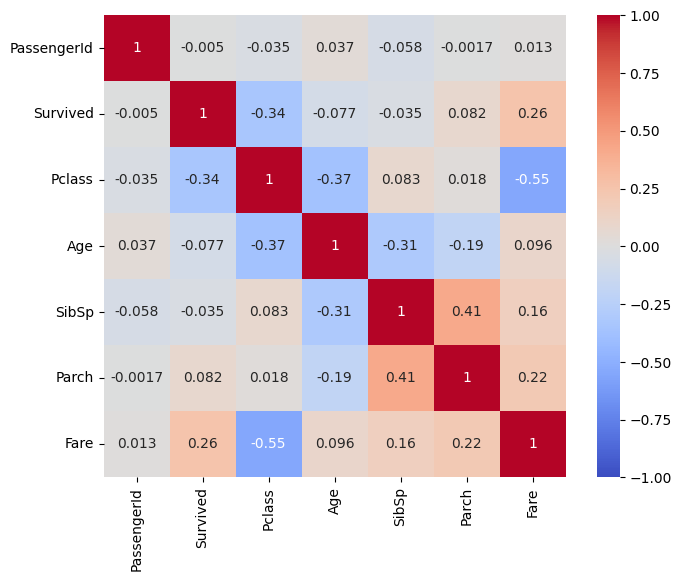

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr('pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)
plt.show()

Из графиков корреляции видим, что высоких зависимостей между колонками - нет.

# Исследовательский анализ данных

Sex


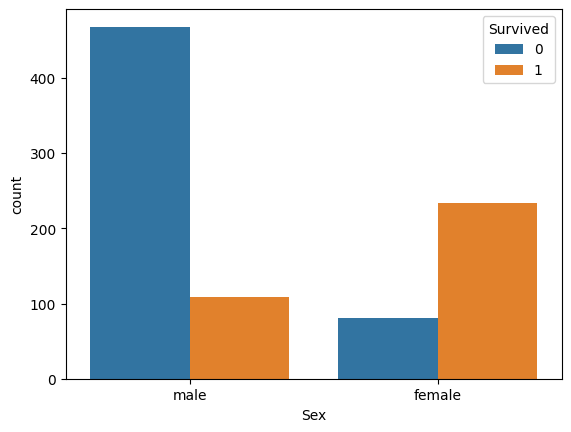


Embarked


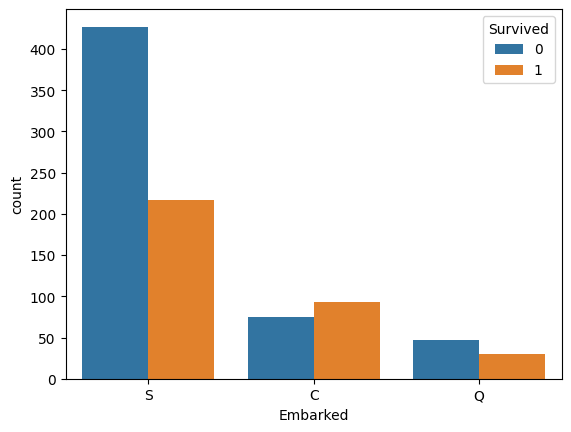


Pclass


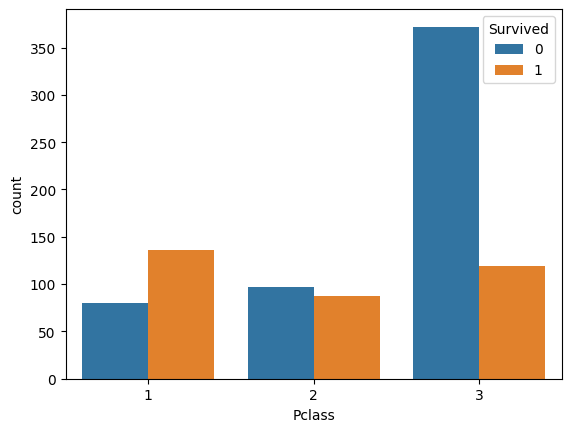


SibSp


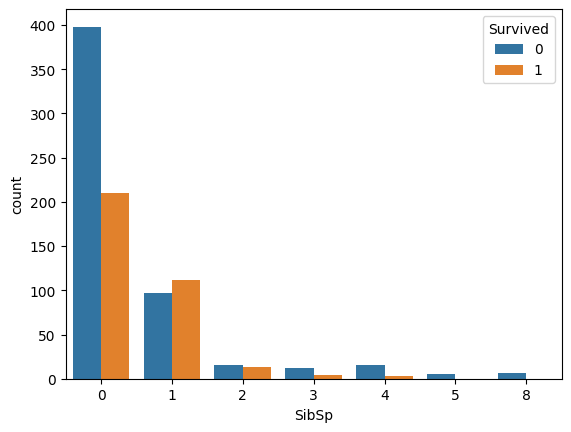


Parch


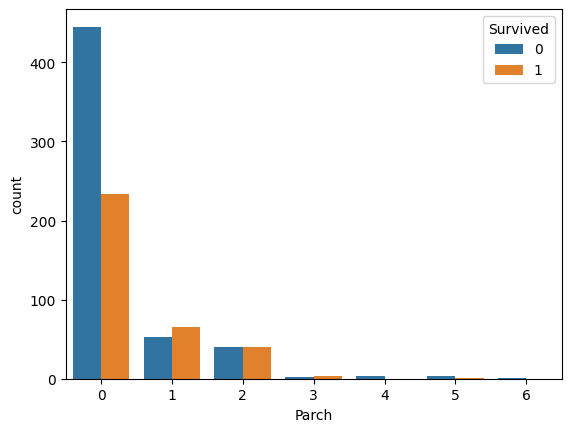

In [29]:
for cols in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(cols)
    sns.countplot(data=train_df, x=cols, hue='Survived')
    plt.show()
    print("")

Из графиков видим следующее: 
1. В основном, выжили женщины - мужчины пропускали их на спасательные шлюпки в первую очередь. 
2. Большая часть пассажиров отправлялись из порта города Southampton, от того крупная часть потерь среди тех, кто садился на корабль из этого города. 
3. Значительная часть пассажиров приобретали билеты 3 (эконом) класса - среди именно этого класса билетов много потерь. Также заметно, что большая часть пассажиров из 1 (люкс) класса  - выжили. 
4. Графики количества родственников пассажиров на борту показывают, что большинство пассажиров путешествовали в одиночку, однако, как показала ситуация, больше шансов на выживание было у людей с 1 родственником на борту.


Взглянем на пропуски в колонке Embarked.

In [30]:
nan_rows_Embarked = train_df[train_df['Embarked'].isna()]
nan_rows_Embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80,B28,NaN


In [31]:
selected_rows = train_df[(train_df['Pclass'] == 1) & (train_df['Survived'] == 1) & (train_df['Sex'] == 'female') & (train_df['Fare']< 82) & (train_df['Fare']> 78)]
selected_rows.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80,B28,NaN
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79,NaN,C
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79,E68,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80,B28,NaN


Заполним колонку подходящим значением.

In [32]:
median_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(median_embarked, inplace=True)

In [33]:
selected_rows = train_df[(train_df['Pclass'] == 1) & (train_df['Survived'] == 1) & (train_df['Sex'] == 'female') & (train_df['Fare']< 82) & (train_df['Fare']> 78)]
selected_rows.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80,B28,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79,NaN,C
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79,E68,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80,B28,S


Удалим лишние колонки.

In [34]:
train_df.drop(['Name','PassengerId','Ticket'], axis= 1, inplace= True)

Посмотрим на распределение возраста пассажиров.

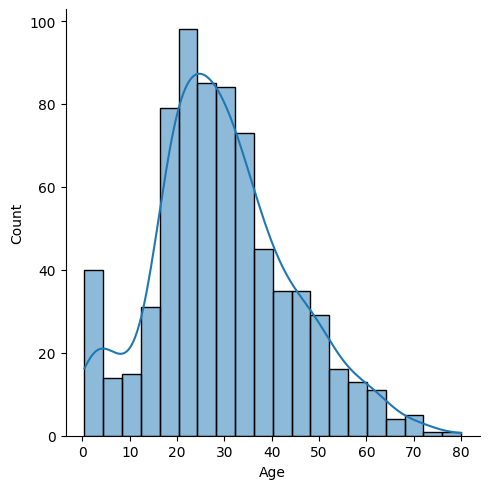

In [35]:
sns.displot(train_df['Age'], kde= True)

Правильнее всего будет заполнить пропуски в колонке Age - медианным значением, так как на него не влияют выбросы значений, следовательно, усредненный таким образом возраст подойдет лучше.

In [36]:
median_age = train_df['Age'].median()
train_df['Age'].fillna(median_age, inplace=True)

In [37]:
print(train_df['Age'].isna())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool


Создадим новый столбец, показывающий, была ли каюта у пассажира и высчитаем шанс на выживание у людей с каютой, а также без нее.

In [38]:

train_df['has_cabin'] = train_df['Cabin'].notnull().astype(int)



survival_rates = train_df.groupby('has_cabin')['Survived'].mean()


print(survival_rates)

has_cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


Видим, что люди жившие в каютах имели шанс на выживание в катастрофе - 67%.

In [39]:
print(train_df[['Cabin', 'has_cabin']].head())

  Cabin  has_cabin
0   NaN          0
1   C85          1
2   NaN          0
3  C123          1
4   NaN          0


In [40]:

num_zeros = (train_df['has_cabin'] == 0).sum()


print(num_zeros)

687


Судя по тому, что у нас достаточно много пропусков в столбце наличия каюты - оставим бинарный столбец, а оригинальный столбец с номером - удалим.

In [41]:
train_df = train_df.drop('Cabin', axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
0,0,3,male,22.0,1,0,7,S,0
1,1,1,female,38.0,1,0,71,C,1
2,1,3,female,26.0,0,0,7,S,0
3,1,1,female,35.0,1,0,53,S,1
4,0,3,male,35.0,0,0,8,S,0


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    int64  
 7   Embarked   891 non-null    object 
 8   has_cabin  891 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


# Подготовка данных к обучению

Так как на графике распределения возраста была явная скошенность - применим StandartScaler и OneHotEncoder к категориальным и количественным данным.

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']), 
        ('cat', OneHotEncoder(sparse_output= False, drop='first'), ['Sex', 'Embarked']) 
    ])

In [44]:
X= preprocessor.fit_transform(train_df)
X.shape

(891, 5)

Получили данные типа array - преобразуем их в новый датасет.

In [45]:
X_transformed = np.hstack((train_df, X))

In [46]:
final_df= pd.DataFrame(columns=['survived','pclass','Sex','age','sibsp','parch','fare','emarked','cabin','nage','nfare','sex','em1','em2'],data= X_transformed)
final_df.head()

,survived,pclass,Sex,age,sibsp,parch,fare,emarked,cabin,nage,nfare,sex,em1,em2
0,0,3,male,22.0,1,0,7,S,0,-0.565736,-0.498948,1.0,0.0,1.0
1,1,1,female,38.0,1,0,71,C,1,0.663861,0.789405,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7,S,0,-0.258337,-0.498948,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53,S,1,0.433312,0.427056,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8,S,0,0.433312,-0.478817,1.0,0.0,1.0


После преобразования данных можно удалить столбцы 'Sex', 'age' и 'fare', так как появились аналогичные колонки с названиями 'nage', 'nfare', 'sex', 'em1', 'em2'.

In [47]:
main_df = final_df[['pclass','sibsp','parch','cabin','nage','nfare','sex','em1','em2']]
main_df = main_df.astype(int)
target = final_df['survived']
target = target.astype(int)

In [48]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pclass  891 non-null    int64
 1   sibsp   891 non-null    int64
 2   parch   891 non-null    int64
 3   cabin   891 non-null    int64
 4   nage    891 non-null    int64
 5   nfare   891 non-null    int64
 6   sex     891 non-null    int64
 7   em1     891 non-null    int64
 8   em2     891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


# Обучение моделей

In [49]:
x_train, x_test, y_train, y_test = train_test_split(main_df, target, test_size = 0.1, random_state=1234)

In [50]:

lr = LogisticRegression()

score_lr = cross_val_score(lr,x_train, y_train, cv= 20)
print(score_lr.mean())

score_lr = score_lr.mean()

0.8000914634146342


# Random Forest

In [51]:
rfc = RandomForestClassifier(n_estimators=10, random_state= 1234)


    
score_rfc = cross_val_score(rfc,x_train, y_train, cv= 20)
print(score_rfc.mean())

score_rfc = score_rfc.mean()

0.8076829268292685


# Decision Tree

In [52]:
dtc = DecisionTreeClassifier(random_state=1234)



score_dtc = cross_val_score(dtc,x_train, y_train, cv= 20)
print(score_dtc.mean())

score_dtc = score_dtc.mean()

0.7977134146341464


# K-Neighbours

In [53]:
knn= KNeighborsClassifier()



score_knn = cross_val_score(knn ,x_train, y_train, cv= 20)
print(score_knn.mean())

score_knn = score_knn.mean()

0.8001829268292683


# Сравнение моделей

In [54]:
models = ['Logistic Regression', 'Random Forest','Decision Tree', 'K-Neighbours']
score = [score_lr, score_rfc, score_dtc, score_knn]

model_comp = pd.DataFrame({'Model': models,'Score': score})

display(model_comp)

,Model,Score
0,Logistic Regression,0.800091
1,Random Forest,0.807683
2,Decision Tree,0.797713
3,K-Neighbours,0.800183


Модель Random Forest показала наиболее качественные результаты. Лучший результат: 0.807.

In [56]:
from sklearn.ensemble import RandomForestClassifier



y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1234)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

# Заключение

Многие вещи увеличили бы шансы на выживание пассажиров, но далеко не все можно было предусмотреть и изменить. Женщины и дети спаслись с большей вероятностью, пассажиры первого класса выжили с большей вероятностью, чем пассажиры второго и третьего классов. Однако, если вы - мужчина на Титанике, то ваш шанс на выживание больше, если на корабль вы сели из Cherbourgh. Также, путешествие, как минимум, с 1 родственником также увеличивало вероятность выживания.